In [30]:
!pip install ipython-autotime
%load_ext autotime
import pandas as pd
from google.colab import drive
import pathlib
import numpy as np
import gc
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import pyarrow.parquet as pq
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from xgboost import plot_importance


drive.mount('/content/drive',force_remount=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Mounted at /content/drive
time: 5.02 s (started: 2022-11-23 10:18:25 +00:00)


In [2]:
random_state=17

time: 729 µs (started: 2022-11-23 06:56:44 +00:00)


In [3]:
XGBRegressorModel = XGBRegressor(max_depth=6, learning_rate=0.09, iteration=250, random_state=random_state)

time: 892 µs (started: 2022-11-23 06:56:44 +00:00)


In [4]:
taxiData = pd.DataFrame()

time: 2.49 ms (started: 2022-11-23 06:56:44 +00:00)


In [5]:
data_dir = "/content/drive/MyDrive/yellow_tripdata_2020_data.parquet"
data_dir = pathlib.Path(data_dir)
yellowTaxiData2020 = pq.ParquetFile(data_dir)
del data_dir

time: 174 ms (started: 2022-11-23 06:56:44 +00:00)


In [6]:
for taxiDataBatch in yellowTaxiData2020.iter_batches(batch_size=2000000):
    taxiDataBatchDF = taxiDataBatch.to_pandas()
    taxiDataBatchDF.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time'], inplace=True)
    taxiData = pd.concat([taxiData, taxiDataBatchDF])


time: 2.92 s (started: 2022-11-23 06:56:45 +00:00)


In [7]:
taxiData.shape

(4069192, 18)

time: 7.93 ms (started: 2022-11-23 06:56:48 +00:00)


In [8]:
del yellowTaxiData2020

time: 553 µs (started: 2022-11-23 06:56:48 +00:00)


In [9]:
gc.collect()

66

time: 77.1 ms (started: 2022-11-23 06:56:48 +00:00)


In [10]:
data_dir = "/content/drive/MyDrive/yellow_tripdata_2021_data.parquet"
data_dir = pathlib.Path(data_dir)
yellowTaxiData2021 = pq.ParquetFile(data_dir)
del data_dir

time: 162 ms (started: 2022-11-23 06:56:49 +00:00)


In [11]:
for taxiDataBatch in yellowTaxiData2021.iter_batches(batch_size=2000000):
    taxiDataBatchDF = taxiDataBatch.to_pandas()
    taxiDataBatchDF.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time'], inplace=True)
    taxiData = pd.concat([taxiData, taxiDataBatchDF])

time: 16.5 s (started: 2022-11-23 06:56:51 +00:00)


In [12]:
scaler = MinMaxScaler()
taxiData = pd.DataFrame(scaler.fit_transform(taxiData.values), columns=taxiData.columns, index=taxiData.index)

time: 7.91 s (started: 2022-11-23 06:57:08 +00:00)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(taxiData.loc[:, (taxiData.columns!='ride_duration')], 
                                                    taxiData.loc[:, 'ride_duration'], 
                                                    test_size=0.4, 
                                                    random_state=random_state)

time: 9.93 s (started: 2022-11-23 06:57:16 +00:00)


In [14]:
del yellowTaxiData2021

time: 635 µs (started: 2022-11-23 06:57:25 +00:00)


In [15]:
del taxiData

time: 634 µs (started: 2022-11-23 06:57:25 +00:00)


In [16]:
gc.collect()

175

time: 57.2 ms (started: 2022-11-23 06:57:25 +00:00)


In [17]:
del taxiDataBatchDF

time: 446 µs (started: 2022-11-23 06:57:26 +00:00)


In [18]:
gc.collect()

44

time: 54.8 ms (started: 2022-11-23 06:57:26 +00:00)


In [19]:
XGBRegressorModel.fit(X_train, y_train)

[06:57:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:57:35] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(iteration=250, learning_rate=0.09, max_depth=6, random_state=17)

time: 2h 24min 12s (started: 2022-11-23 06:57:29 +00:00)


In [20]:
predictions = XGBRegressorModel.predict(X_test)

time: 59.7 s (started: 2022-11-23 09:21:53 +00:00)


In [21]:
predictions_train = XGBRegressorModel.predict(X_train)

time: 1min 29s (started: 2022-11-23 09:22:58 +00:00)


In [22]:
rmse_train = mean_squared_error(y_train, predictions_train)**0.5
print(f'The RMSE of training prediction is: {rmse_train}')

The RMSE of training prediction is: 0.10741046544906936
time: 191 ms (started: 2022-11-23 09:25:20 +00:00)


In [23]:
mse_train = mean_squared_error(y_train, predictions_train)
print(f'The MSE of training prediction is: {mse_train}')

The MSE of training prediction is: 0.011537008087985723
time: 73.3 ms (started: 2022-11-23 09:25:29 +00:00)


In [24]:
mae_train = mean_absolute_error(y_train, predictions_train)
print(f'The MAE of training prediction is: {mae_train}')

The MAE of training prediction is: 0.08050702934962413
time: 165 ms (started: 2022-11-23 09:25:31 +00:00)


In [25]:
rmse_test = mean_squared_error(y_test, predictions)**0.5
print(f'The RMSE of prediction is: {rmse_test}')

The RMSE of prediction is: 0.10739925367263024
time: 49.5 ms (started: 2022-11-23 09:25:32 +00:00)


In [26]:
mse_test = mean_squared_error(y_test, predictions)
print(f'The MSE of prediction is: {mse_test}')

The MSE of prediction is: 0.01153459968943798
time: 50.2 ms (started: 2022-11-23 09:25:35 +00:00)


In [27]:
mae_test = mean_absolute_error(y_test, predictions)
print(f'The MAE of training prediction is: {mae_test}')

The MAE of training prediction is: 0.08048598340565506
time: 55.9 ms (started: 2022-11-23 09:25:37 +00:00)


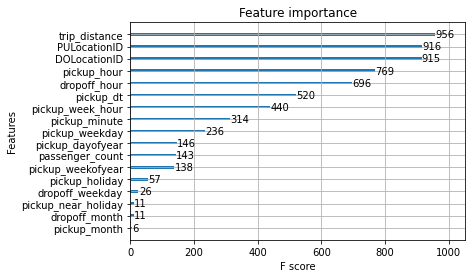

time: 246 ms (started: 2022-11-23 10:19:28 +00:00)


In [32]:
plot_importance(XGBRegressorModel)